<a href="https://colab.research.google.com/github/anirbanroy987/AI-Expert-Roadmap/blob/main/Machine_Hack_Competition_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.1MB/s 


In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


root_path = '/content/drive/MyDrive/Datasets/Participants_Data_TGIH/Train.csv'  #change dir to your project folder

train_data = pd.read_csv(root_path)

new_data = pd.read_csv(root_path)
root_path_test = '/content/drive/MyDrive/Datasets/Participants_Data_TGIH/Test.csv'  #change dir to your project folder

test_data = pd.read_csv(root_path_test)

In [6]:
def convert_int_to_object(data,cols):
  for i in cols:
    data[i] = data[i].apply(str)
  # train_data['Country'] = train_data['Country'].apply(str)
  # train_data['YearMonth'] = train_data['YearMonth'].apply(str)
    # data[i] = test_data[i].apply(str)
  # test_data['Country'] = test_data['Country'].apply(str)
  # test_data['YearMonth'] = test_data['YearMonth'].apply(str)

  
convert_int_to_object(train_data,["Description","CustomerID", "InvoiceNo","Description",'StockCode'])
convert_int_to_object(test_data,["Description","CustomerID", "InvoiceNo","Description",'StockCode'])

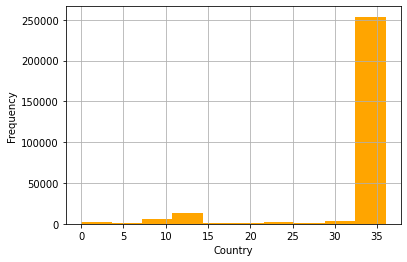

Number of samples:  284756


In [15]:
def plot_histogram_col(data,columns):
  data[columns].hist(color = 'orange')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()

def describe_dataset(data, target_col):
    ncats = []
    ncats10 = []
    ncats100 = []
    nsamples_median = []
    X_col_names = list(data.columns)
    X_col_names.remove(target_col)
    print('Number of samples: ', data.shape[0])
    for col in X_col_names:
        counts = data.groupby([col])[col].count()
        ncats.append(len(counts))
        ncats10.append(len(counts[counts<10]))
        ncats100.append(len(counts[counts<100]))
        nsamples_median.append(counts.median())
    data_review_df = pd.DataFrame({'Column':X_col_names, 'Number of categories':ncats, 
                                   'Categories with < 10 samples':ncats10,
                                   'Categories with < 100 samples':ncats100,
                                   'Median samples in category':nsamples_median})
    data_review_df = data_review_df.loc[:, ['Column', 'Number of categories',
                                             'Median samples in category',
                                             'Categories with < 10 samples',
                                             'Categories with < 100 samples']]
    return data_review_df.sort_values(by=['Number of categories'], ascending=False)

def categorial_year_month(column_name,df):
    monthMap = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
# Extracting Month and Year from Date columns
    df['Year'] = pd.DatetimeIndex(df[column_name]).year
    df['Month'] = pd.DatetimeIndex(df[column_name]).month

    df['YearMonth'] = df["Year"].astype(str) + df["Month"].map(monthMap)
    df['YearMonth'] = df['YearMonth'].apply(lambda x: int(x))

    
categorial_year_month('InvoiceDate',train_data)
plot_histogram_col(train_data,'Country')
describe_dataset(train_data,'UnitPrice')
categorial_year_month('InvoiceDate',test_data)

# Feature Engineering With Analysis 

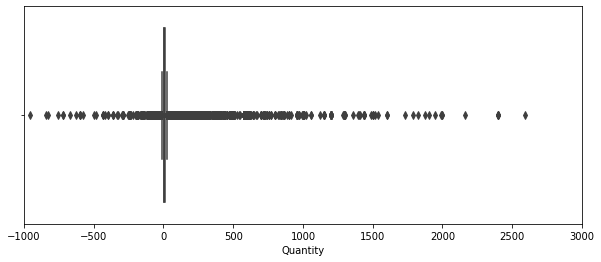

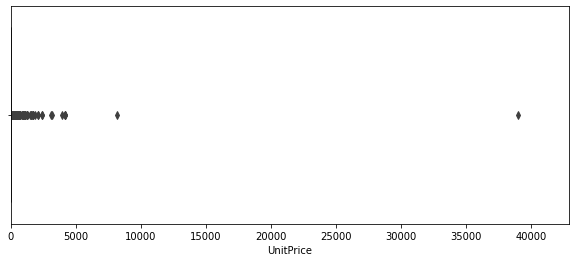

In [7]:
plt.figure(figsize=(10,4))
plt.xlim(-1000, 3000)
sns.boxplot(x=train_data.Quantity)

plt.figure(figsize=(10,4))
plt.xlim(train_data.UnitPrice.min(), train_data.UnitPrice.max()*1.1)
sns.boxplot(x=train_data.UnitPrice)

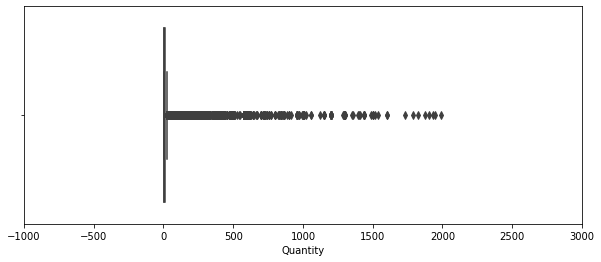

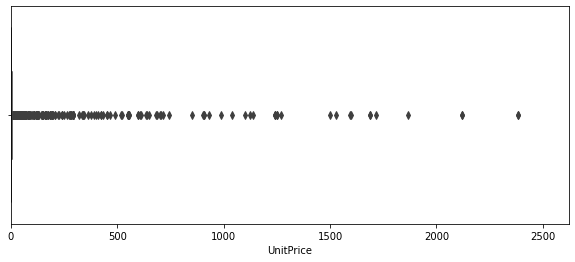

In [8]:
#Remove train_data outliers based on data visualization

train_data = train_data[train_data.UnitPrice<3000]
train_data = train_data[train_data.Quantity<2000]
train_data["Quantity"] = np.where(train_data["Quantity"]<0,train_data["Quantity"]*-1,train_data["Quantity"])

plt.figure(figsize=(10,4))
plt.xlim(-1000, 3000)
sns.boxplot(x=train_data.Quantity)

plt.figure(figsize=(10,4))
plt.xlim(train_data.UnitPrice.min(), train_data.UnitPrice.max()*1.1)
sns.boxplot(x=train_data.UnitPrice)

In [ ]:
#Check for Categorical values present in Test and Train Data 

len(list(set(test_data.StockCode) - set(test_data.StockCode).intersection(set(new_data.StockCode)))), len(list(set(test_data.StockCode)))

(65, 3410)

In [ ]:
len(list(set(test_data.Country) - set(test_data.Country).intersection(set(train_data.Country)))), len(list(set(test_data.Country)))

(0, 37)

In [ ]:
len(set(train_data.StockCode).intersection(set(test_data.StockCode)))

3345

Text(0.5, 0, 'Price')

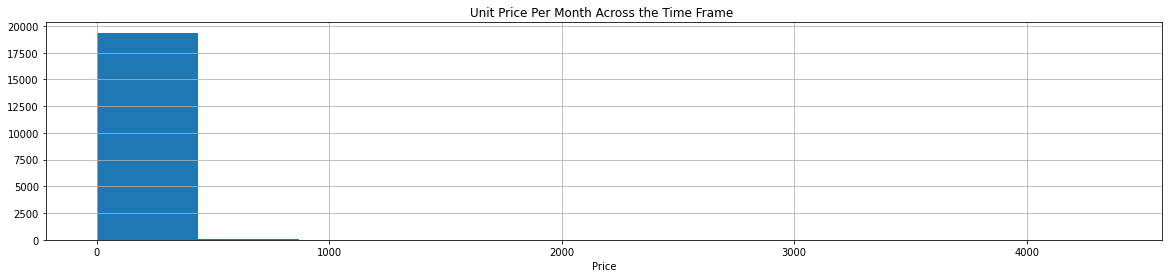

In [13]:
#Unit Price Per Month 
train_data['InvoiceDate'] = pd.to_datetime(train_data['InvoiceDate'])
train_data.groupby(train_data.InvoiceDate).sum()['UnitPrice'].hist(figsize = (20,4))
plt.title('Unit Price Per Month Across the Time Frame ')
plt.xlabel('Price')


Min Value: 0.0
Max Value: 38970.0
Average Value: 3.451215899989596
Center Point of Data: 1.95


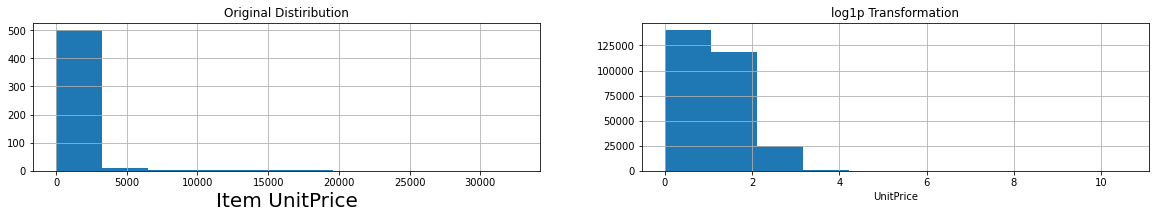

In [ ]:
def unresanable_data(data):
    print("Min Value:",data.min())
    print("Max Value:",data.max())
    print("Average Value:",data.mean())
    print("Center Point of Data:",data.median())


unresanable_data(train_data['UnitPrice'])
count_price = train_data.UnitPrice.value_counts().sort_index(ascending=False)
plt.subplot(221)
count_price.hist(figsize=(20,6))
plt.xlabel('Item UnitPrice', fontsize=20);
plt.title('Original Distiribution')

plt.subplot(222)
train_data.UnitPrice.map(np.log1p).hist(figsize=(20,6))
plt.xlabel('UnitPrice');
plt.title('log1p Transformation')
train_data.loc[:,'UnitPrice'] = train_data.UnitPrice.map(np.log1p)

In [ ]:
# -1 and 307980 looks like outliers, let's delete them
print('before train shape:', train_data.shape)
train_data = train_data[(train_data.UnitPrice > 0) & (train_data.UnitPrice < 300000)]
print('after train shape:', train_data.shape)

before train shape: (284756, 11)
after train shape: (284723, 11)


In [17]:



# train_data=train_data.drop('Year',axis=1)
# train_data=train_data.drop('Month',axis=1)
# train_data=train_data.drop('Month',axis=1)

train_data['Country'] = train_data['Country'].apply(str)
train_data['YearMonth'] = train_data['YearMonth'].apply(str)
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284756 entries, 0 to 284779
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284756 non-null  object        
 1   StockCode    284756 non-null  object        
 2   Description  284756 non-null  object        
 3   Quantity     284756 non-null  int64         
 4   InvoiceDate  284756 non-null  datetime64[ns]
 5   UnitPrice    284756 non-null  float64       
 6   CustomerID   284756 non-null  object        
 7   Country      284756 non-null  object        
 8   Year         284756 non-null  int64         
 9   Month        284756 non-null  int64         
 10  YearMonth    284756 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 26.1+ MB


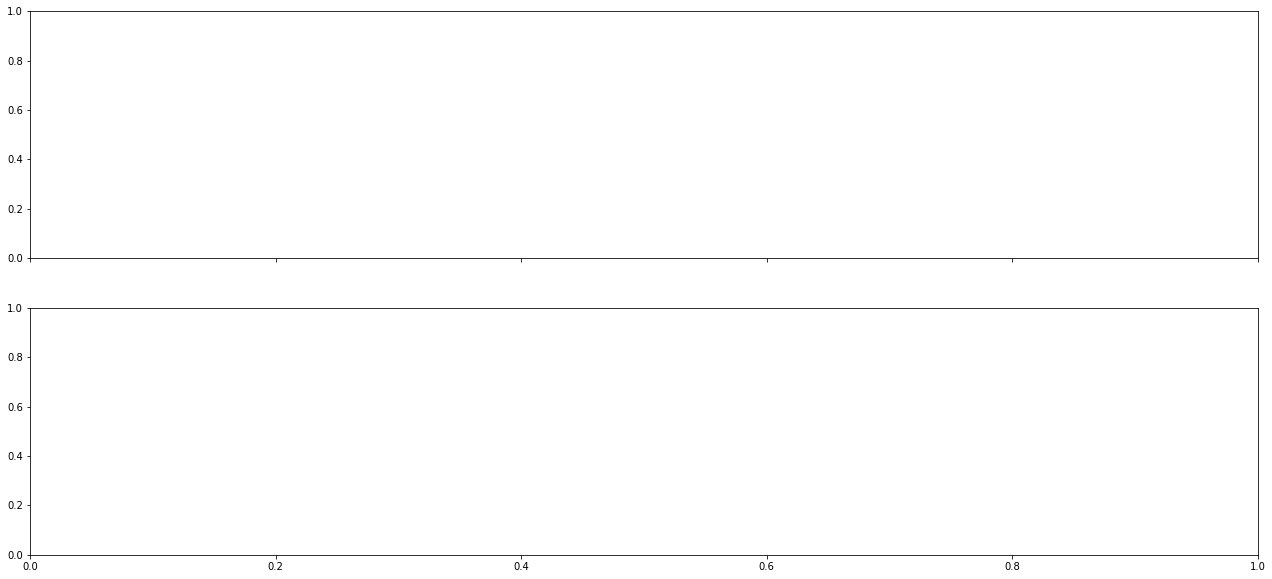

In [18]:
#Sales Per Month


# train_data.groupby('YearMonth').sum()['Quantity'].hist(figsize = (20,4))
# plt.title('Quantity  per month histogram')
# plt.xlabel('Quantity')



gp_month_mean = train_data.groupby(['YearMonth'], as_index=False)['UnitPrice'].mean()
gp_month_mean
gp_month_sum = train_data.groupby(['YearMonth'], as_index=False)['UnitPrice'].sum()
gp_month_sum

gp_category_mean = train_data.groupby(['StockCode'], as_index=False)['UnitPrice'].mean()
gp_category_sum = train_data.groupby(['StockCode'], as_index=False)['UnitPrice'].sum()
gp_category_mean


gp_category_mean
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
# sns.lineplot(x="YearMonth", y="UnitPrice", data=gp_month_mean, ax=axes[0]).set_title("YearMonthly Monthly mean")
# sns.lineplot(x="YearMonth", y="UnitPrice", data=gp_month_sum, ax=axes[1]).set_title("YearMonthly sum")

# f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
# sns.lineplot(x="StockCode", y="UnitPrice", data=gp_category_mean, ax=axes[0]).set_title("By StockCode mean")
# sns.lineplot(x="StockCode", y="UnitPrice", data=gp_category_sum, ax=axes[1]).set_title("Monthly sum")



plt.show()



In [19]:
train_monthly = train_data.copy()

gp_item_price = train_monthly.sort_values('YearMonth').groupby(['StockCode'], as_index=False).agg({'UnitPrice':[ np.max]})

gp_item_price.columns = ['StockCode','hist_max_item_price']
train_monthly = pd.merge(train_monthly, gp_item_price, on=['StockCode'], how='left')

train_monthly.head()




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,hist_max_item_price
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,201105,4.18
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,201105,4.13
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,201111,5.95
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,201111,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,201105,1.65


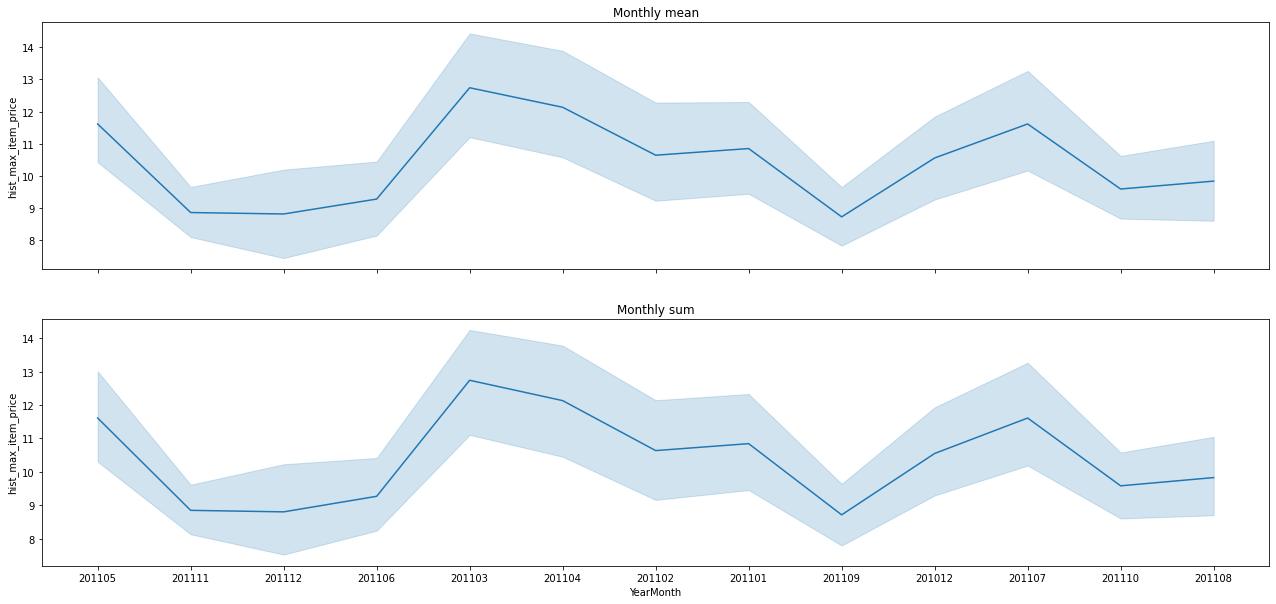

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="YearMonth", y="hist_max_item_price", data=train_monthly, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="YearMonth", y="hist_max_item_price", data=train_monthly, ax=axes[1]).set_title("Monthly sum")
plt.show()

In [22]:
train_Data = train_data.set_index('InvoiceDate')


train_Data


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,YearMonth
InvoiceDate,,,,,,,,,,
2011-05-06 16:54:00,6141,1583,144,3,3.75,14056.0,35,2011,5,201105
2011-05-11 07:35:00,6349,1300,3682,6,1.95,13098.0,35,2011,5,201105
2011-11-20 13:20:00,16783,2178,1939,4,5.95,15044.0,35,2011,11,201111
2011-11-22 12:07:00,16971,2115,2983,1,0.83,15525.0,35,2011,11,201111
2011-05-06 09:00:00,6080,1210,2886,12,1.65,13952.0,35,2011,5,201105
...,...,...,...,...,...,...,...,...,...,...
2011-03-01 12:07:00,3408,1706,1081,6,1.65,17965.0,35,2011,3,201103
2011-10-13 15:08:00,13982,2184,2947,16,0.65,16793.0,35,2011,10,201110
2011-05-16 12:59:00,6641,667,3632,4,8.50,14755.0,35,2011,5,201105


In [ ]:


train_data['Country'] = train_data['Country'].apply(str)
train_data['YearMonth'] = train_data['YearMonth'].apply(str)
train_data['StockCode'] = train_data['StockCode'].apply(str)

train_data=train_data.drop('InvoiceDate',axis=1)
# train_data=train_data.drop('Year',axis=1)
# train_data=train_data.drop('Month',axis=1)
train_data = train_data.drop(columns=["Description","CustomerID", "InvoiceNo"], axis = 1)


In [ ]:
test_stockcode = test_data['StockCode'].unique()
test_country = test_data['Country'].unique()
# Only shops that exist in test set.
lk_train = train_data[train_data['StockCode'].isin(test_stockcode)]
# Only items that exist in test set.
lk_train = lk_train[lk_train['Country'].isin(test_country)]


print('Data set size before leaking:', train_data.shape[0])
print('Data set size after leaking:', lk_train.shape[0])

Data set size before leaking: 5
Data set size after leaking: 5


In [34]:
train_data["Quantity"] = np.where(train_data["Quantity"]<0,train_data["Quantity"]*-1,train_data["Quantity"])
train_monthly = train_data.query('Quantity >= 0 and Quantity <= 20 and UnitPrice < 400000')
train_monthly

# gp_item_price = train_monthly.sort_values('YearMonth').groupby(['StockCode'], as_index=False).agg({'UnitPrice':[ np.max]})
gp_item_price = train_monthly.sort_values('YearMonth').groupby(['StockCode'], as_index=False).agg({'UnitPrice':[np.min, np.max]})
gp_item_price.columns = ['StockCode', 'hist_min_item_price', 'hist_max_item_price']
# gp_item_price.columns = ['StockCode','hist_max_item_price']
train_monthly = pd.merge(train_monthly, gp_item_price, on=['StockCode'], how='left')

In [38]:
train_monthly['price_decrease'] = train_monthly['hist_max_item_price'] - train_monthly['UnitPrice']
train_monthly['price_increase'] = train_monthly['UnitPrice'] - train_monthly['hist_min_item_price']
# train_monthly = train_monthly.set_index('InvoiceDate')
train_monthly

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase
InvoiceDate,,,,,,,,,,,,,,
2011-05-06 16:54:00,6141,1583,144,3,3.75,14056.0,35,2011,5,201105,3.39,3.75,0.00,0.36
2011-05-11 07:35:00,6349,1300,3682,6,1.95,13098.0,35,2011,5,201105,1.95,4.13,2.18,0.00
2011-11-20 13:20:00,16783,2178,1939,4,5.95,15044.0,35,2011,11,201111,4.95,5.95,0.00,1.00
2011-11-22 12:07:00,16971,2115,2983,1,0.83,15525.0,35,2011,11,201111,0.83,0.83,0.00,0.00
2011-05-06 09:00:00,6080,1210,2886,12,1.65,13952.0,35,2011,5,201105,1.65,1.65,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05 16:03:00,18147,3106,2124,12,0.85,13230.0,35,2011,12,201112,0.85,1.80,0.95,0.00
2011-03-01 12:07:00,3408,1706,1081,6,1.65,17965.0,35,2011,3,201103,1.65,1.65,0.00,0.00
2011-10-13 15:08:00,13982,2184,2947,16,0.65,16793.0,35,2011,10,201110,0.65,0.65,0.00,0.00


<Figure size 1296x432 with 0 Axes>

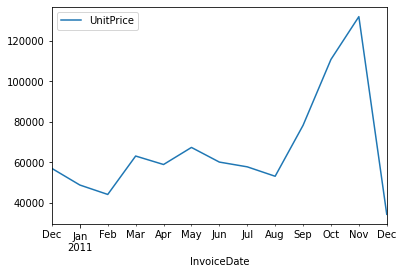

In [24]:
df_ts = train_monthly[['UnitPrice']]
df_ts.head()
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('M').sum()
df_resample.plot()

In [39]:
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
train_monthly['PriceRange'] = pd.cut(train_monthly['UnitPrice'], bins=bins_p)
train_monthly.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,PriceRange
InvoiceDate,,,,,,,,,,,,,,,
2011-05-06 16:54:00,6141,1583,144,3,3.75,14056.0,35,2011,5,201105,3.39,3.75,0.00,0.36,"(3, 4]"
2011-05-11 07:35:00,6349,1300,3682,6,1.95,13098.0,35,2011,5,201105,1.95,4.13,2.18,0.00,"(1, 2]"
2011-11-20 13:20:00,16783,2178,1939,4,5.95,15044.0,35,2011,11,201111,4.95,5.95,0.00,1.00,"(4, 20]"
2011-11-22 12:07:00,16971,2115,2983,1,0.83,15525.0,35,2011,11,201111,0.83,0.83,0.00,0.00,"(0, 1]"
2011-05-06 09:00:00,6080,1210,2886,12,1.65,13952.0,35,2011,5,201105,1.65,1.65,0.00,0.00,"(1, 2]"


In [40]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
train_monthly['DateRange'] = pd.cut(train_monthly['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
train_monthly.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,PriceRange,DateRange
InvoiceDate,,,,,,,,,,,,,,,,
2011-12-05 16:03:00,18147,3106,2124,12,0.85,13230.0,35,2011,12,201112,0.85,1.80,0.95,0.00,"(0, 1]","(9, 12]"
2011-03-01 12:07:00,3408,1706,1081,6,1.65,17965.0,35,2011,3,201103,1.65,1.65,0.00,0.00,"(1, 2]","(0, 3]"
2011-10-13 15:08:00,13982,2184,2947,16,0.65,16793.0,35,2011,10,201110,0.65,0.65,0.00,0.00,"(0, 1]","(9, 12]"
2011-05-16 12:59:00,6641,667,3632,4,8.50,14755.0,35,2011,5,201105,7.45,8.50,0.00,1.05,"(4, 20]","(3, 6]"
2011-08-22 13:30:00,11042,2603,1156,2,0.75,17585.0,35,2011,8,201108,0.75,4.25,3.50,0.00,"(0, 1]","(6, 9]"


In [30]:
train_monthly.PriceRange.nunique(),train_monthly.DateRange.nunique()

(5, 4)

In [41]:
train_monthly_imp_features = train_monthly.drop(["Month", "Year",'InvoiceNo','Description','CustomerID'], axis = 1)
train_monthly_imp_features.head()

,StockCode,Quantity,UnitPrice,Country,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,PriceRange,DateRange
InvoiceDate,,,,,,,,,,,
2011-05-06 16:54:00,1583,3,3.75,35,201105,3.39,3.75,0.00,0.36,"(3, 4]","(3, 6]"
2011-05-11 07:35:00,1300,6,1.95,35,201105,1.95,4.13,2.18,0.00,"(1, 2]","(3, 6]"
2011-11-20 13:20:00,2178,4,5.95,35,201111,4.95,5.95,0.00,1.00,"(4, 20]","(9, 12]"
2011-11-22 12:07:00,2115,1,0.83,35,201111,0.83,0.83,0.00,0.00,"(0, 1]","(9, 12]"
2011-05-06 09:00:00,1210,12,1.65,35,201105,1.65,1.65,0.00,0.00,"(1, 2]","(3, 6]"


In [42]:
train_monthly_train = train_monthly_imp_features.copy()
train_monthly_train = pd.get_dummies(train_monthly_train, columns=['PriceRange'], prefix='qr')
# df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
train_monthly_train = pd.get_dummies(train_monthly_train, columns=['DateRange'], prefix='dr')
train_monthly_train.head()

,StockCode,Quantity,UnitPrice,Country,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,"qr_(0, 1]","qr_(1, 2]","qr_(2, 3]","qr_(3, 4]","qr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
InvoiceDate,,,,,,,,,,,,,,,,,,
2011-05-06 16:54:00,1583,3,3.75,35,201105,3.39,3.75,0.00,0.36,0,0,0,1,0,0,1,0,0
2011-05-11 07:35:00,1300,6,1.95,35,201105,1.95,4.13,2.18,0.00,0,1,0,0,0,0,1,0,0
2011-11-20 13:20:00,2178,4,5.95,35,201111,4.95,5.95,0.00,1.00,0,0,0,0,1,0,0,0,1
2011-11-22 12:07:00,2115,1,0.83,35,201111,0.83,0.83,0.00,0.00,1,0,0,0,0,0,0,0,1
2011-05-06 09:00:00,1210,12,1.65,35,201105,1.65,1.65,0.00,0.00,0,1,0,0,0,0,1,0,0


In [33]:
# train_data_encode,test_data_encode = mean_encode(train_data, test_data, ['StockCode', 'Quantity', 'Country', 'YearMonth'], 'UnitPrice', reg_method='expanding_mean',
#                 alpha=0, add_random=False, rmean=0, rstd=0.1, folds=1)


In [45]:

#first use target encoding each group, then shift month to creat lag features
def target_encoding(matrix_, groupby_feats, target, enc_feat):
    print ('target encoding for',groupby_feats)
    group = matrix_.groupby(groupby_feats).agg({target:'mean'})
    group.columns = [enc_feat]
    group.reset_index(inplace=True)
    matrix = matrix_.merge(group, on=groupby_feats, how='left')
    
    return matrix

In [67]:
matrix = target_encoding(train_monthly_train, ['StockCode'], 'UnitPrice', 'StockCode_x')

target encoding for ['StockCode']


In [68]:
matrix1 = matrix.copy()
train_monthly_train_encoded = matrix1.drop('StockCode',axis=1)
# train_monthly_train_encoded = matrix.drop('Country',axis=1)
train_monthly_train_encoded

,Quantity,UnitPrice,Country,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,"qr_(0, 1]","qr_(1, 2]","qr_(2, 3]","qr_(3, 4]","qr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]",StockCode_x
0,3,3.75,35,201105,3.39,3.75,0.00,0.36,0,0,0,1,0,0,1,0,0,3.747778
1,6,1.95,35,201105,1.95,4.13,2.18,0.00,0,1,0,0,0,0,1,0,0,1.985543
2,4,5.95,35,201111,4.95,5.95,0.00,1.00,0,0,0,0,1,0,0,0,1,5.943377
3,1,0.83,35,201111,0.83,0.83,0.00,0.00,1,0,0,0,0,0,0,0,1,0.830000
4,12,1.65,35,201105,1.65,1.65,0.00,0.00,0,1,0,0,0,0,1,0,0,1.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245999,12,0.85,35,201112,0.85,1.80,0.95,0.00,1,0,0,0,0,0,0,0,1,0.871923
246000,6,1.65,35,201103,1.65,1.65,0.00,0.00,0,1,0,0,0,1,0,0,0,1.650000
246001,16,0.65,35,201110,0.65,0.65,0.00,0.00,1,0,0,0,0,0,0,0,1,0.650000
246002,4,8.50,35,201105,7.45,8.50,0.00,1.05,0,0,0,0,1,0,1,0,0,8.496097


In [70]:
matrix_country = target_encoding(train_monthly_train_encoded, ['StockCode_x'], 'UnitPrice', 'Country_x')
train_monthly_train_encoded = matrix_country.drop('Country',axis=1)

target encoding for ['StockCode_x']


In [71]:
train_monthly_train_encoded

,Quantity,UnitPrice,YearMonth,hist_min_item_price,hist_max_item_price,price_decrease,price_increase,"qr_(0, 1]","qr_(1, 2]","qr_(2, 3]","qr_(3, 4]","qr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]",StockCode_x,Country_x
0,3,3.75,201105,3.39,3.75,0.00,0.36,0,0,0,1,0,0,1,0,0,3.747778,3.747778
1,6,1.95,201105,1.95,4.13,2.18,0.00,0,1,0,0,0,0,1,0,0,1.985543,1.985543
2,4,5.95,201111,4.95,5.95,0.00,1.00,0,0,0,0,1,0,0,0,1,5.943377,5.943377
3,1,0.83,201111,0.83,0.83,0.00,0.00,1,0,0,0,0,0,0,0,1,0.830000,0.830000
4,12,1.65,201105,1.65,1.65,0.00,0.00,0,1,0,0,0,0,1,0,0,1.650000,1.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245999,12,0.85,201112,0.85,1.80,0.95,0.00,1,0,0,0,0,0,0,0,1,0.871923,0.871923
246000,6,1.65,201103,1.65,1.65,0.00,0.00,0,1,0,0,0,1,0,0,0,1.650000,1.650000
246001,16,0.65,201110,0.65,0.65,0.00,0.00,1,0,0,0,0,0,0,0,1,0.650000,0.650000
246002,4,8.50,201105,7.45,8.50,0.00,1.05,0,0,0,0,1,0,1,0,0,8.496097,8.496097


In [78]:

# train = train_monthly_train_encoded.drop(['UnitPrice','YearMonth','Quantity'],axis=1)
# target = train_monthly_train_encoded["UnitPrice"]
# train.info()

train.columns 

#Rename Index 

train = train.rename(columns={ 'qr_(0, 1]': "Q_1", 'qr_(1, 2]': "QR_2",'qr_(2, 3]': "QR_3",'qr_(3, 4]': "QR_4",'qr_(4, 20]': "QR_5",'dr_(0, 3]': "DR_1",'dr_(3, 6]': "DR_2", 'dr_(6, 9]': "DR_3",'dr_(9, 12]': "DR_4"})

In [80]:
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=97)
# X_train_prac, X_test_prac, y_train_prac, y_test_prac = train_test_split(X_train, y_train, test_size=0.2, random_state=97)
# X_test_prac.info, y_test_prac.info

In [81]:
import time
ts = time.time()

model = XGBRegressor(
    max_depth=7,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    gamma = 0.005,
    eta=0.1,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=10, 
    early_stopping_rounds = 40,
    )

time.time() - ts

[07:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:17.5222	validation_1-rmse:18.3706
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 40 rounds.
[10]	validation_0-rmse:15.562	validation_1-rmse:16.1092
[20]	validation_0-rmse:15.0609	validation_1-rmse:15.4636
[30]	validation_0-rmse:14.8222	validation_1-rmse:15.1524
[40]	validation_0-rmse:14.5737	validation_1-rmse:14.8782
[50]	validation_0-rmse:14.3722	validation_1-rmse:14.6555
[60]	validation_0-rmse:14.2345	validation_1-rmse:14.5125
[70]	validation_0-rmse:14.1029	validation_1-rmse:14.3611
[80]	validation_0-rmse:13.9624	validation_1-rmse:14.215
[90]	validation_0-rmse:13.8355	validation_1-rmse:14.0963
[100]	validation_0-rmse:13.7192	validation_1-rmse:13.9891
[110]	validation_0-rmse:13.6173	validation_1-rmse:13.8782
[120]	validation_0-rmse:13.5138

243.8250617980957

In [ ]:
df_list = [train_monthly[feature_engineered], test_data]
df = pd.concat(df_list, axis=1, join='inner')

df = df.drop(df.columns[[0, 1]], axis=1)
df

In [82]:
test_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Year,Month,YearMonth
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2011,2,201102
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,2010,12,201012
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,2011,10,201110
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,2011,6,201106
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,2011,11,201111
...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35,2011,6,201106
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35,2011,6,201106
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35,2010,12,201012
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35,2011,6,201106
